# Human activity recognition-

## Machine learning models to recognize the activity of a person based on the activities carried out. Sensors were used to collect the data from different users while they were doing their regular works. 

## Problem statement:

1.	Perform exploratory data analysis to check for:
2.	Build a machine learning model to classify the data 
3.	Cluster the data using K-Means clustering algorithm.  The value of K shouldn’t be based on the given class information. Instead, use elbow criteria to find the optimal value for K to cluster the data.
4.	Compare the results of both classification and clustering techniques. Check of there are any false negative, false positive cases. 

### Meta data regarding the dataset - 
The Human Activity Recognition database was built from the recordings of 30 study participants performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. The objective is to classify activities into one of the six activities performed.

Description of experiment:-

The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKINGUPSTAIRS, WALKINGDOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.

Attribute information

For each record in the dataset the following is provided:
1.Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.
2.Triaxial Angular velocity from the gyroscope.
3.A 561-feature vector with time and frequency domain variables.
4.Its activity label.
5.An identifier of the subject who carried out the experiment.

### Import basic required packages

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importing variance threshold to check cols with constant var 
from sklearn.feature_selection import VarianceThreshold

# importing KMeans, k_means to perform kmeans clustering 
from sklearn.cluster import KMeans, k_means

### 1. Import data

In [2]:
train = pd.read_csv(r'train.csv')
test = pd.read_csv(r'test.csv')

### 2. Data pre-processing 

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB


In [5]:
print("Percentage of test data is: ",np.round((2947/(7352+2947))*100,2))
# Our testing data is 28.61% of complete data

print("Percentage of train data is: ",np.round((7352/(7352+2947))*100,2))
# Our testing data is 71.39% of complete data

Percentage of test data is:  28.61
Percentage of train data is:  71.39


In [6]:
train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


### 2.1. Checking for missing values

In [7]:
train.isna().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [8]:
test.isna().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [9]:
print('Total number of missing values in train : ', train.isna().values.sum())
print('Total number of missing values in train : ', test.isna().values.sum())

Total number of missing values in train :  0
Total number of missing values in train :  0


### 2.2. Checking for duplicates

In [10]:
print('Number of duplicates in train : ',sum(train.duplicated()))
print('Number of duplicates in test : ', sum(test.duplicated()))

Number of duplicates in train :  0
Number of duplicates in test :  0


### 2.3. Checking for datatypes

In [11]:
train.dtypes

tBodyAcc-mean()-X       float64
tBodyAcc-mean()-Y       float64
tBodyAcc-mean()-Z       float64
tBodyAcc-std()-X        float64
tBodyAcc-std()-Y        float64
                         ...   
angle(X,gravityMean)    float64
angle(Y,gravityMean)    float64
angle(Z,gravityMean)    float64
subject                   int64
Activity                 object
Length: 563, dtype: object

In [12]:
test.dtypes

tBodyAcc-mean()-X       float64
tBodyAcc-mean()-Y       float64
tBodyAcc-mean()-Z       float64
tBodyAcc-std()-X        float64
tBodyAcc-std()-Y        float64
                         ...   
angle(X,gravityMean)    float64
angle(Y,gravityMean)    float64
angle(Z,gravityMean)    float64
subject                   int64
Activity                 object
Length: 563, dtype: object

### 2.4. Gathering information regarding all columns

In [13]:
train.columns.values

array(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z',
       'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y',
       'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y',
       'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y',
       'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1',
       'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3',
       'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1',
       'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3',
       'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1',
       'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3',
       'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y',
       'tBodyAcc-correlation()-

In [14]:
test.Activity.unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [15]:
test.subject.unique()

array([ 2,  4,  9, 10, 12, 13, 18, 20, 24], dtype=int64)

In [16]:
train.Activity.unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [17]:
train.subject.unique()

array([ 1,  3,  5,  6,  7,  8, 11, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26,
       27, 28, 29, 30], dtype=int64)

### 2.5. Checking for imbalance in data

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'STANDING'),
  Text(1, 0, 'SITTING'),
  Text(2, 0, 'LAYING'),
  Text(3, 0, 'WALKING'),
  Text(4, 0, 'WALKING_DOWNSTAIRS'),
  Text(5, 0, 'WALKING_UPSTAIRS')])

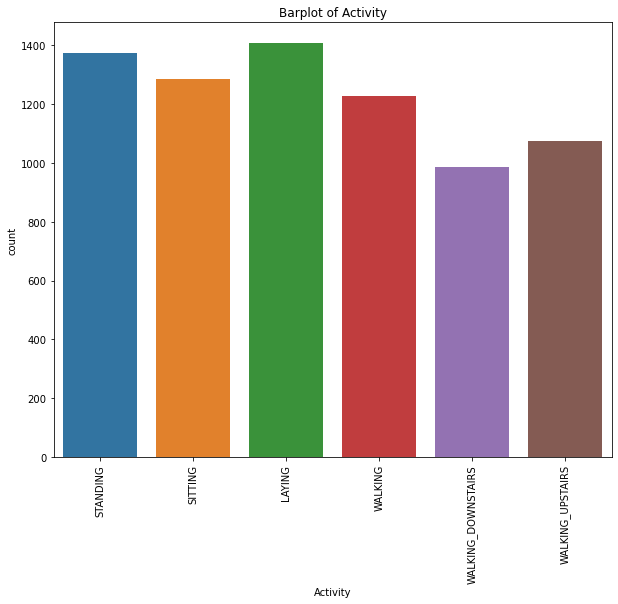

In [18]:
# Here, we have checked imbalance regarding 'Activity' because we are classifying our model based on different activites.
plt.figure(figsize=(10,8))
plt.title('Barplot of Activity')
sns.countplot(train.Activity)
plt.xticks(rotation=90)

CONCLUSION - There is almost same number of observations across all the six activities so this data does not have class imbalance problem.

### 3.Feature selection

In [19]:
train.shape

(7352, 563)

In [20]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [21]:
# We are dropping subject and activity from our dataset.
y_train=train['Activity']
X_train=train.drop(labels=['subject','Activity'], axis=1)

y_test=test['Activity']
X_test=test.drop(labels=['subject','Activity'], axis=1)

X_train.shape, X_test.shape

((7352, 561), (2947, 561))

### Lets apply variance threshold 

In [22]:
# Here, threshold = 0 signify, var = 0 ,ie we are trying to find out columns with var = 0
var_thres=VarianceThreshold(threshold=0)  
var_thres.fit(X_train)

var_thres_test=VarianceThreshold(threshold=0)  
var_thres_test.fit(X_test)

VarianceThreshold(threshold=0)

In [23]:
var_thres.get_support()
# Here true indicates that no value has constant variance.
# Hence we cannot drop any col using this technique, let's try any other feature engg.

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [24]:
var_thres_test.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [25]:
### Finding non constant features
sum(var_thres.get_support())


561

In [26]:
sum(var_thres_test.get_support())

561

### Lets apply correlation 

In [27]:
# Using correlation we will find out highly correlated values and then remove them because they can act as duplicates.

In [28]:
train.corr()
# We are using pearson correlation here.

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
tBodyAcc-mean()-X,1.000000,0.148061,-0.256952,0.000619,-0.021903,-0.044617,0.006290,-0.022754,-0.047558,0.044062,...,-0.017557,-0.015613,-0.544320,0.012173,0.037444,0.028844,-0.035257,0.034371,0.028242,0.024181
tBodyAcc-mean()-Y,0.148061,1.000000,-0.078769,-0.045160,-0.044920,-0.049746,-0.044180,-0.045049,-0.050402,-0.038108,...,-0.001587,-0.004459,0.070559,-0.013541,0.017967,0.075679,-0.005309,0.001053,-0.013903,-0.003144
tBodyAcc-mean()-Z,-0.256952,-0.078769,1.000000,-0.020217,-0.016641,-0.008410,-0.018747,-0.015203,-0.001988,-0.037197,...,0.020091,0.019127,0.052841,-0.039836,-0.063609,-0.034037,0.008587,-0.015288,-0.022643,-0.000637
tBodyAcc-std()-X,0.000619,-0.045160,-0.020217,1.000000,0.927461,0.851668,0.998632,0.920888,0.846392,0.980844,...,0.148034,0.115565,-0.035011,-0.021633,0.018985,-0.024810,-0.371653,0.471065,0.394825,-0.064345
tBodyAcc-std()-Y,-0.021903,-0.044920,-0.016641,0.927461,1.000000,0.895510,0.922803,0.997347,0.894509,0.917366,...,0.206227,0.176946,-0.020379,-0.012505,-0.008507,-0.014592,-0.380531,0.523600,0.433169,-0.115524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(tBodyGyroJerkMean,gravityMean)",0.028844,0.075679,-0.034037,-0.024810,-0.014592,-0.006471,-0.024951,-0.012341,-0.007231,-0.028871,...,-0.017937,-0.014865,-0.020823,0.035263,-0.116001,1.000000,0.023995,-0.005869,-0.005656,0.009340
"angle(X,gravityMean)",-0.035257,-0.005309,0.008587,-0.371653,-0.380531,-0.345011,-0.368191,-0.377025,-0.347389,-0.384192,...,-0.086006,-0.079751,0.011880,0.023246,-0.005853,0.023995,1.000000,-0.783848,-0.643655,0.026137
"angle(Y,gravityMean)",0.034371,0.001053,-0.015288,0.471065,0.523600,0.476006,0.466424,0.525081,0.477607,0.480229,...,0.086993,0.078079,0.001540,-0.012990,-0.012313,-0.005869,-0.783848,1.000000,0.594885,-0.009829
"angle(Z,gravityMean)",0.028242,-0.013903,-0.022643,0.394825,0.433169,0.482828,0.390922,0.431459,0.479751,0.405023,...,0.057831,0.052548,-0.003069,-0.017520,-0.019903,-0.005656,-0.643655,0.594885,1.000000,-0.098712


In [29]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [30]:
# Here, we are taking our threshold to be 0.85
corr_features = correlation(train, 0.85)
len(set(corr_features))

389

In [31]:
# Here, we are taking our threshold to be 0.9 because using 0.85 we were getting 389 features that were correlated which is a pretty big number to drop

corr_features = correlation(train, 0.9)
len(set(corr_features))

359

In [32]:
corr_features 

{'angle(X,gravityMean)',
 'angle(Y,gravityMean)',
 'angle(Z,gravityMean)',
 'fBodyAcc-bandsEnergy()-1,16',
 'fBodyAcc-bandsEnergy()-1,16.1',
 'fBodyAcc-bandsEnergy()-1,16.2',
 'fBodyAcc-bandsEnergy()-1,24',
 'fBodyAcc-bandsEnergy()-1,24.1',
 'fBodyAcc-bandsEnergy()-1,24.2',
 'fBodyAcc-bandsEnergy()-1,8',
 'fBodyAcc-bandsEnergy()-1,8.1',
 'fBodyAcc-bandsEnergy()-1,8.2',
 'fBodyAcc-bandsEnergy()-17,24.1',
 'fBodyAcc-bandsEnergy()-17,24.2',
 'fBodyAcc-bandsEnergy()-17,32',
 'fBodyAcc-bandsEnergy()-17,32.1',
 'fBodyAcc-bandsEnergy()-17,32.2',
 'fBodyAcc-bandsEnergy()-25,48',
 'fBodyAcc-bandsEnergy()-25,48.1',
 'fBodyAcc-bandsEnergy()-25,48.2',
 'fBodyAcc-bandsEnergy()-33,48',
 'fBodyAcc-bandsEnergy()-33,48.1',
 'fBodyAcc-bandsEnergy()-33,48.2',
 'fBodyAcc-bandsEnergy()-49,64',
 'fBodyAcc-bandsEnergy()-49,64.1',
 'fBodyAcc-bandsEnergy()-49,64.2',
 'fBodyAcc-bandsEnergy()-9,16',
 'fBodyAcc-bandsEnergy()-9,16.1',
 'fBodyAcc-energy()-X',
 'fBodyAcc-energy()-Y',
 'fBodyAcc-energy()-Z',
 'fBodyA

In [33]:
train_new = train.drop(corr_features,axis=1)
train_new


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2",...,fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.913526,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,...,-0.991048,-1.000000,-0.074323,-0.298676,-0.112754,0.030400,-0.464761,-0.018446,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.960322,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,...,-0.994440,-1.000000,0.158075,-0.595051,0.053477,-0.007435,-0.732626,0.703511,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.978944,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,...,-0.995866,-0.555556,0.414503,-0.390748,-0.118559,0.177899,0.100699,0.808529,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.990675,-0.627446,-0.850930,-0.911872,0.061436,0.074840,...,-0.995732,-0.936508,0.404573,-0.117290,-0.036788,-0.012892,0.640011,-0.485366,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.990482,-0.786553,-0.559477,-0.761434,0.313276,-0.131208,...,-0.997418,-0.936508,0.087753,-0.351471,0.123320,0.122542,0.693578,-0.615971,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.077078,0.195643,0.140158,-0.082077,-0.561607,0.426433,...,-0.925241,-0.904762,-0.070157,-0.588433,-0.190437,0.829718,0.206972,-0.425619,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.059280,0.178138,0.293566,-0.051532,-0.361660,0.149854,...,-0.761880,-0.904762,0.165259,-0.390738,0.064907,0.875679,-0.879033,0.400219,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,0.274533,0.173131,0.276040,0.152003,-0.376773,0.200784,...,-0.692582,-0.904762,0.195034,0.025145,0.052806,-0.266724,0.864404,0.701169,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,0.268893,0.160333,0.246561,0.021678,-0.475165,0.296546,...,-0.886154,-0.904762,0.013865,0.063907,-0.101360,0.700740,0.936674,-0.589479,30,WALKING_UPSTAIRS


In [34]:
train_new.shape

(7352, 204)

In [35]:
train.shape

(7352, 563)

In [36]:
test_new=test.drop(corr_features,axis=1)
test_new


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2",...,fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.667683,-0.168084,-0.378996,0.246217,0.521204,-0.487793,...,-0.909829,-1.000000,0.071645,-0.330370,0.006462,0.162920,-0.825886,0.271151,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.944958,-0.302437,-0.348243,-0.404785,0.507492,-0.156495,...,-0.986902,-1.000000,-0.401189,-0.121845,-0.083495,0.017500,-0.434375,0.920593,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.962748,-0.617916,-0.695490,-0.536693,0.242147,-0.114997,...,-0.989609,-0.936508,0.062891,-0.190422,-0.034956,0.202302,0.064103,0.145068,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.967091,-0.749578,-0.899226,-0.553813,0.174684,-0.051332,...,-0.992021,-0.936508,0.116695,-0.344418,-0.017067,0.154438,0.340134,0.296407,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.978295,-0.590576,-0.740206,-0.799419,0.115570,-0.028923,...,-0.992505,-0.936508,-0.121711,-0.534685,-0.002223,-0.040046,0.736715,-0.118545,2,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.215088,0.128951,0.250479,0.204483,-0.336571,0.119363,...,-0.770173,-0.904762,0.074472,-0.376278,-0.337422,0.346295,0.884904,-0.698885,24,WALKING_UPSTAIRS
2943,0.363385,-0.039214,-0.105915,-0.305388,-0.196373,0.311991,0.277052,0.112971,-0.141648,-0.020623,...,-0.947627,-0.904762,0.101859,-0.320418,-0.736701,-0.372889,-0.657421,0.322549,24,WALKING_UPSTAIRS
2944,0.349966,0.030077,-0.115788,-0.329638,-0.250181,0.342902,0.411568,0.167789,-0.093074,-0.146011,...,-0.930426,-0.904762,-0.066249,-0.118854,-0.181560,0.088574,0.696663,0.363139,24,WALKING_UPSTAIRS
2945,0.237594,0.018467,-0.096499,-0.323114,-0.207574,0.194918,0.383999,0.352585,-0.100123,-0.218944,...,-0.785712,-0.904762,-0.046467,-0.205445,0.444558,-0.819188,0.929294,-0.008398,24,WALKING_UPSTAIRS


In [37]:
train_new.shape

(7352, 204)

In [38]:
test_new.shape

(2947, 204)

In [39]:
train_new.columns.values

array(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Z', 'tBodyAcc-entropy()-X',
       'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z',
       'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2',
       'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-X,4',
       'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Y,2',
       'tBodyAcc-arCoeff()-Y,3', 'tBodyAcc-arCoeff()-Y,4',
       'tBodyAcc-arCoeff()-Z,1', 'tBodyAcc-arCoeff()-Z,2',
       'tBodyAcc-arCoeff()-Z,3', 'tBodyAcc-arCoeff()-Z,4',
       'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-X,Z',
       'tBodyAcc-correlation()-Y,Z', 'tGravityAcc-mean()-X',
       'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z',
       'tGravityAcc-std()-X', 'tGravityAcc-std()-Y',
       'tGravityAcc-std()-Z', 'tGravityAcc-sma()',
       'tGravityAcc-energy()-Y', 'tGravityAcc-energy()-Z',
       'tGravityAcc-entropy()-X', 'tGravityAcc-entropy()-Y',
       'tGravityAcc-entropy()-Z', 'tGravity

In [40]:
# Here, we have removed brackets , commas and hyphen from our features. So, that we can use them easily.

columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
# Removing '-' from column names
columns = columns.str.replace('[-]', '')
# Removing ',' from column names
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagkurtosis', 'angletBodyAccMeangravity',
       'angletBodyAccJerkMeangravityMean', 'angletBodyGyroMeangravityMean',
       'angletBodyGyroJerkMeangravityMean', 'angleXgravityMean',
       'angleYgravityMean', 'angleZgravityMean', 'subject', 'Activity'],
      dtype='object', length=563)

In [41]:
columns = train_new.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
# Removing '-' from column names
columns = columns.str.replace('[-]', '')
# Removing ',' from column names
columns = columns.str.replace('[,]','')
train_new.columns = columns
test_new.columns = columns

train_new['tBodyAccMagmean'] = train['tBodyAccMagmean']
test_new['tBodyAccMagmean'] = test['tBodyAccMagmean']

In [42]:
#We are separting activites in order to find out 5 number summary of different Activities.
'''For Train_new dataset'''
stationary_sitting = train_new[train_new['Activity'] == 'SITTING']
stationary_standing = train_new[train_new['Activity'] == 'STANDING']
stationary_laying = train_new[train_new['Activity'] == 'LAYING']
non_stationary_walking = train_new[train_new['Activity'] == 'WALKING']
non_stationary_walking_downstairs = train_new[train_new['Activity'] == 'WALKING_DOWNSTAIRS']
non_stationary_walking_upstairs = train_new[train_new['Activity'] == 'WALKING_UPSTAIRS']

#We are separting activites in order to find out 5 number summary of different Activities. 
'''For test_new dataset'''
stationary_sitting_test = test_new[test_new['Activity'] == 'SITTING']
stationary_standing_test = test_new[test_new['Activity'] == 'STANDING']
stationary_laying_test = test_new[test_new['Activity'] == 'LAYING']
non_stationary_walking_test = test_new[test_new['Activity'] == 'WALKING']
non_stationary_walking_downstairs_test = test_new[test_new['Activity'] == 'WALKING_DOWNSTAIRS']
non_stationary_walking_upstairs_test = test_new[test_new['Activity'] == 'WALKING_UPSTAIRS']

#### Calculating 5 number summary of all activities

In [43]:
# Five number summary of sitting.
five_number_summary_sitting = stationary_sitting.tBodyAccMagmean.describe()
print("Five number summary of sitting for train data\n")
print(five_number_summary_sitting)
print("----------------------------------------------------------------\n")
print("Five number summary of sitting for test data\n")
five_number_summary_sitting_test = stationary_sitting_test.tBodyAccMagmean.describe()
print(five_number_summary_sitting_test)

Five number summary of sitting for train data

count    1286.000000
mean       -0.955068
std         0.086437
min        -1.000000
25%        -0.992453
50%        -0.984851
75%        -0.960789
max        -0.223233
Name: tBodyAccMagmean, dtype: float64
----------------------------------------------------------------

Five number summary of sitting for test data

count    491.000000
mean      -0.953534
std        0.089063
min       -0.998591
25%       -0.991657
50%       -0.980809
75%       -0.957677
max       -0.123096
Name: tBodyAccMagmean, dtype: float64


In [44]:
# Five number summary of standing.
five_number_summary_standing = stationary_standing.tBodyAccMagmean.describe()
print("Five number summary of standing for train data\n")
print(five_number_summary_standing)
print("----------------------------------------------------------------\n")
print("Five number summary of standing for test data\n")
five_number_summary_standing_test = stationary_standing_test.tBodyAccMagmean.describe()
print(five_number_summary_standing_test)

Five number summary of standing for train data

count    1374.000000
mean       -0.956789
std         0.060417
min        -0.999501
25%        -0.989643
50%        -0.978733
75%        -0.949049
max        -0.348313
Name: tBodyAccMagmean, dtype: float64
----------------------------------------------------------------

Five number summary of standing for test data

count    532.000000
mean      -0.947441
std        0.067128
min       -0.997389
25%       -0.983460
50%       -0.969014
75%       -0.939914
max       -0.287426
Name: tBodyAccMagmean, dtype: float64


In [45]:
# Five number summary of laying.
five_number_summary_laying = stationary_laying.tBodyAccMagmean.describe()
print("Five number summary of laying for train data\n")
print(five_number_summary_laying)
print("----------------------------------------------------------------\n")
print("Five number summary of laying for test data\n")
five_number_summary_laying_test = stationary_laying_test.tBodyAccMagmean.describe()
print(five_number_summary_laying_test)

Five number summary of laying for train data

count    1407.000000
mean       -0.933299
std         0.163902
min        -0.999504
25%        -0.991582
50%        -0.977767
75%        -0.955555
max         0.715238
Name: tBodyAccMagmean, dtype: float64
----------------------------------------------------------------

Five number summary of laying for test data

count    537.000000
mean      -0.961579
std        0.075252
min       -0.998936
25%       -0.990406
50%       -0.979936
75%       -0.962036
max       -0.204008
Name: tBodyAccMagmean, dtype: float64


In [46]:
# Five number summary of walking.
five_number_summary_walking = non_stationary_walking.tBodyAccMagmean.describe()
print("Five number summary of walking for train data\n")
print(five_number_summary_walking)
print("----------------------------------------------------------------\n")
print("Five number summary of walking for test data\n")
five_number_summary_walking_test = non_stationary_walking_test.tBodyAccMagmean.describe()
print(five_number_summary_walking_test)

Five number summary of walking for train data

count    1226.000000
mean       -0.160787
std         0.134050
min        -0.529357
25%        -0.242103
50%        -0.172838
75%        -0.082391
max         0.295477
Name: tBodyAccMagmean, dtype: float64
----------------------------------------------------------------

Five number summary of walking for test data

count    496.000000
mean      -0.185613
std        0.131374
min       -0.421486
25%       -0.295033
50%       -0.201449
75%       -0.089158
max        0.251978
Name: tBodyAccMagmean, dtype: float64


In [47]:
# Five number summary of walking downstairs.
five_number_summary_walking_downstairs = non_stationary_walking_downstairs.tBodyAccMagmean.describe()
print("Five number summary of walking downstairs for train data\n")
print(five_number_summary_walking_downstairs)
print("----------------------------------------------------------------\n")
print("Five number summary of walking downstairs for test data\n")
five_number_summary_walking_downstairs_test = non_stationary_walking_downstairs_test.tBodyAccMagmean.describe()
print(five_number_summary_walking_downstairs_test)

Five number summary of walking downstairs for train data

count    986.000000
mean       0.137366
std        0.205654
min       -0.395864
25%        0.020519
50%        0.139481
75%        0.264105
max        1.000000
Name: tBodyAccMagmean, dtype: float64
----------------------------------------------------------------

Five number summary of walking downstairs for test data

count    420.000000
mean       0.016462
std        0.196470
min       -0.403343
25%       -0.129769
50%        0.008661
75%        0.168682
max        0.479547
Name: tBodyAccMagmean, dtype: float64


In [48]:
# Five number summary of walking upstairs.
five_number_summary_walking_upstairs = non_stationary_walking_upstairs.tBodyAccMagmean.describe()
print("Five number summary of walking upstairs for train data\n")
print(five_number_summary_walking_upstairs)
print("----------------------------------------------------------------\n")
print("Five number summary of walking upstairs for test data\n")
five_number_summary_walking_upstairs_test = non_stationary_walking_upstairs_test.tBodyAccMagmean.describe()
print(five_number_summary_walking_upstairs_test)

Five number summary of walking upstairs for train data

count    1073.000000
mean       -0.075450
std         0.146687
min        -0.437360
25%        -0.184365
50%        -0.093635
75%         0.024503
max         0.353232
Name: tBodyAccMagmean, dtype: float64
----------------------------------------------------------------

Five number summary of walking upstairs for test data

count    471.000000
mean      -0.156597
std        0.121008
min       -0.469501
25%       -0.247634
50%       -0.167947
75%       -0.077429
max        0.218056
Name: tBodyAccMagmean, dtype: float64


In [49]:
# Creating a dataframe in order to read 5 number summary more accurately.
'''For train data'''
df = pd.DataFrame(data = [five_number_summary_sitting,five_number_summary_standing,five_number_summary_laying, five_number_summary_walking, five_number_summary_walking_upstairs,five_number_summary_walking_downstairs],
                  index=['sitting','standing','laying','walking','walking_upstairs','walking_downstairs'])
df = df.T
print(df)

print("-----------------------------------------------------------------------------------\n")
'''For test data'''
df_test = pd.DataFrame(data = [five_number_summary_sitting_test,five_number_summary_standing_test,five_number_summary_laying_test, five_number_summary_walking_test, five_number_summary_walking_upstairs_test,five_number_summary_walking_downstairs_test],
                  index=['sitting','standing','laying','walking','walking_upstairs','walking_downstairs'])
df_test = df_test.T
print(df_test)

           sitting     standing       laying      walking  walking_upstairs  \
count  1286.000000  1374.000000  1407.000000  1226.000000       1073.000000   
mean     -0.955068    -0.956789    -0.933299    -0.160787         -0.075450   
std       0.086437     0.060417     0.163902     0.134050          0.146687   
min      -1.000000    -0.999501    -0.999504    -0.529357         -0.437360   
25%      -0.992453    -0.989643    -0.991582    -0.242103         -0.184365   
50%      -0.984851    -0.978733    -0.977767    -0.172838         -0.093635   
75%      -0.960789    -0.949049    -0.955555    -0.082391          0.024503   
max      -0.223233    -0.348313     0.715238     0.295477          0.353232   

       walking_downstairs  
count          986.000000  
mean             0.137366  
std              0.205654  
min             -0.395864  
25%              0.020519  
50%              0.139481  
75%              0.264105  
max              1.000000  
------------------------------------

#### Finding the value at which we can divide stationary and non- stationary activites
For that we are calculating the upper and lower whiskers for all activities

In [50]:
'''For train dataset'''
IQR = five_number_summary_sitting["75%"] - five_number_summary_sitting["25%"]
upper_limit_sitting = (1.5 * IQR) + five_number_summary_sitting["75%"]
lower_limit_sitting = five_number_summary_sitting["25%"] - (1.5 * IQR)
print("IQR:",IQR)
print("1.5 * IQR:", (1.5 * IQR))
print("upper_limit_sitting:",upper_limit_sitting)# upper whisker is drawn at -0.9132922887499999
print("lower_limit_sitting:",lower_limit_sitting)# lower whisker is drawn at -1.03994893875
print()
print("---------------------------------------------------")
'''For test dataset'''
print()
IQR_test = five_number_summary_sitting_test["75%"] - five_number_summary_sitting_test["25%"]
upper_limit_sitting_test = (1.5 * IQR_test) + five_number_summary_sitting_test["75%"]
lower_limit_sitting_test = five_number_summary_sitting_test["25%"] - (1.5 * IQR_test)
print("IQR_test:",IQR_test)
print("1.5 * IQR_test:", (1.5 * IQR_test))
print("upper_limit_sitting_test:",upper_limit_sitting_test)# upper whisker is drawn at -0.9132922887499999
print("lower_limit_sitting_test:",lower_limit_sitting_test)# lower whisker is drawn at -1.03994893875

IQR: 0.03166416250000004
1.5 * IQR: 0.047496243750000056
upper_limit_sitting: -0.9132922887499999
lower_limit_sitting: -1.03994893875

---------------------------------------------------

IQR_test: 0.033980154999999956
1.5 * IQR_test: 0.050970232499999935
upper_limit_sitting_test: -0.9067064475000002
lower_limit_sitting_test: -1.0426270675


In [51]:
'''For train dataset'''
IQR = five_number_summary_standing["75%"] - five_number_summary_standing["25%"]
upper_limit_standing = (1.5 * IQR) + five_number_summary_standing["75%"]
lower_limit_standing = five_number_summary_standing["25%"] - (1.5 * IQR)
print("IQR:",IQR)
print("1.5 * IQR:", (1.5 * IQR))
print("upper_limit_standing:",upper_limit_standing)# upper whisker is drawn at -0.888157335
print("lower_limit_standing:",lower_limit_standing)# lower whisker is drawn at -1.050533855
print()
print("---------------------------------------------------")
'''For test dataset'''
print()
IQR_test = five_number_summary_standing_test["75%"] - five_number_summary_standing_test["25%"]
upper_limit_standing_test = (1.5 * IQR_test) + five_number_summary_standing_test["75%"]
lower_limit_standing_test = five_number_summary_standing_test["25%"] - (1.5 * IQR_test)
print("IQR_test:",IQR_test)
print("1.5 * IQR_test:", (1.5 * IQR_test))
print("upper_limit_standing_test:",upper_limit_standing_test)# upper whisker is drawn at -0.888157335
print("lower_limit_standing_test:",lower_limit_standing_test)# lower whisker is drawn at -1.050533855

IQR: 0.040594130000000006
1.5 * IQR: 0.06089119500000001
upper_limit_standing: -0.888157335
lower_limit_standing: -1.050533855

---------------------------------------------------

IQR_test: 0.043546172500000146
1.5 * IQR_test: 0.06531925875000022
upper_limit_standing_test: -0.8745944137499997
lower_limit_standing_test: -1.0487791037500003


In [52]:
'''For train dataset'''
IQR = five_number_summary_laying["75%"] - five_number_summary_laying["25%"]
upper_limit_laying = (1.5 * IQR) + five_number_summary_laying["75%"]
lower_limit_laying = five_number_summary_laying["25%"] - (1.5 * IQR)
print("IQR:",IQR)
print("1.5 * IQR:", (1.5 * IQR))
print("upper_limit_laying:",upper_limit_laying)# upper whisker is drawn at -0.9015142774999999
print("lower_limit_laying:",lower_limit_laying)# lower whisker is drawn at -1.0456231375000002
print()
print("---------------------------------------------------")
'''For test dataset'''
print()
IQR_test = five_number_summary_laying_test["75%"] - five_number_summary_laying_test["25%"]
upper_limit_laying_test = (1.5 * IQR_test) + five_number_summary_laying_test["75%"]
lower_limit_laying_test = five_number_summary_laying_test["25%"] - (1.5 * IQR_test)
print("IQR_test:",IQR_test)
print("1.5 * IQR_test:", (1.5 * IQR_test))
print("upper_limit_laying_test:",upper_limit_laying_test)# upper whisker is drawn at -0.9015142774999999
print("lower_limit_laying_test:",lower_limit_laying_test)# lower whisker is drawn at -1.0456231375000002_test

IQR: 0.03602721500000006
1.5 * IQR: 0.054040822500000085
upper_limit_laying: -0.9015142774999999
lower_limit_laying: -1.0456231375000002

---------------------------------------------------

IQR_test: 0.028369169999999944
1.5 * IQR_test: 0.042553754999999915
upper_limit_laying_test: -0.9194826050000001
lower_limit_laying_test: -1.032959285


In [53]:
'''For train dataset'''
IQR = five_number_summary_walking["75%"] - five_number_summary_walking["25%"]
upper_limit_walking = (1.5 * IQR) + five_number_summary_walking["75%"]
lower_limit_walking = five_number_summary_walking["25%"] - (1.5 * IQR)
print("IQR:",IQR)
print("1.5 * IQR:", (1.5 * IQR))
print("upper_limit_walking:",upper_limit_walking)# upper whisker is drawn at 0.15717570749999998
print("lower_limit_walking:",lower_limit_walking)# lower whisker is drawn at -0.4816697765
print()
print("---------------------------------------------------")
'''For test dataset'''
print()
IQR_test = five_number_summary_walking_test["75%"] - five_number_summary_walking_test["25%"]
upper_limit_walking_test = (1.5 * IQR_test) + five_number_summary_walking_test["75%"]
lower_limit_walking_test = five_number_summary_walking_test["25%"] - (1.5 * IQR_test)
print("IQR_test:",IQR_test)
print("1.5 * IQR_test:", (1.5 * IQR_test))
print("upper_limit_walking_test:",upper_limit_walking_test)# upper whisker is drawn at 0.15717570749999998
print("lower_limit_walking_test:",lower_limit_walking_test)# lower whisker is drawn at -0.4816697765_test

IQR: 0.159711371
1.5 * IQR: 0.2395670565
upper_limit_walking: 0.15717570749999998
lower_limit_walking: -0.4816697765

---------------------------------------------------

IQR_test: 0.20587440024999992
1.5 * IQR_test: 0.3088116003749999
upper_limit_walking_test: 0.21965335812499986
lower_limit_walking_test: -0.6038442428749998


In [54]:
'''For train dataset'''
IQR = five_number_summary_walking_downstairs["75%"] - five_number_summary_walking_downstairs["25%"]
upper_limit_walking_downstairs = (1.5 * IQR) + five_number_summary_walking_downstairs["75%"]
lower_limit_walking_downstairs = five_number_summary_walking_downstairs["25%"] - (1.5 * IQR)
print("IQR:",IQR)
print("1.5 * IQR:", (1.5 * IQR))
print("upper_limit_walking_downstairs:",upper_limit_walking_downstairs)# upper whisker is drawn at 0.6294840751249999
print("lower_limit_walking_downstairs:",lower_limit_walking_downstairs)# lower whisker is drawn at -0.344859451875
print()
print("---------------------------------------------------")
'''For test dataset'''
print()
IQR_test = five_number_summary_walking_downstairs_test["75%"] - five_number_summary_walking_downstairs_test["25%"]
upper_limit_walking_downstairs_test = (1.5 * IQR_test) + five_number_summary_walking_downstairs_test["75%"]
lower_limit_walking_downstairs_test = five_number_summary_walking_downstairs_test["25%"] - (1.5 * IQR_test)
print("IQR_test:",IQR_test)
print("1.5 * IQR_test:", (1.5 * IQR_test))
print("upper_limit_walking_downstairs_test:",upper_limit_walking_downstairs_test)# upper whisker is drawn at 0.6294840751249999
print("lower_limit_walking_downstairs_test:",lower_limit_walking_downstairs_test)# lower whisker is drawn at -0.344859451875_test

IQR: 0.24358588175
1.5 * IQR: 0.365378822625
upper_limit_walking_downstairs: 0.6294840751249999
lower_limit_walking_downstairs: -0.344859451875

---------------------------------------------------

IQR_test: 0.29845068750000003
1.5 * IQR_test: 0.44767603125000005
upper_limit_walking_downstairs_test: 0.6163576137500001
lower_limit_walking_downstairs_test: -0.57744513625


In [55]:
'''For train dataset'''
IQR = five_number_summary_walking_upstairs["75%"] - five_number_summary_walking_upstairs["25%"]
upper_limit_walking_upstairs = (1.5 * IQR) + five_number_summary_walking_upstairs["75%"]
lower_limit_walking_upstairs = five_number_summary_walking_upstairs["25%"] - (1.5 * IQR)
print("IQR:",IQR)
print("1.5 * IQR:", (1.5 * IQR))
print("upper_limit_walking_upstairs:",upper_limit_walking_upstairs)# upper whisker is drawn at 0.337805305
print("lower_limit_walking_upstairs:",lower_limit_walking_upstairs)# lower whisker is drawn at -0.497666575
print()
print("---------------------------------------------------")
'''For test dataset'''
print()
IQR_test = five_number_summary_walking_upstairs_test["75%"] - five_number_summary_walking_upstairs_test["25%"]
upper_limit_walking_upstairs_test = (1.5 * IQR_test) + five_number_summary_walking_upstairs_test["75%"]
lower_limit_walking_upstairs_test = five_number_summary_walking_upstairs_test["25%"] - (1.5 * IQR_test)
print("IQR_test:",IQR_test)
print("1.5 * IQR_test:", (1.5 * IQR_test))
print("upper_limit_walking_upstairs_test:",upper_limit_walking_upstairs_test)# upper whisker is drawn at 0.337805305
print("lower_limit_walking_upstairs_test:",lower_limit_walking_upstairs_test)# lower whisker is drawn at -0.497666575_test

IQR: 0.20886797000000001
1.5 * IQR: 0.313301955
upper_limit_walking_upstairs: 0.337805305
lower_limit_walking_upstairs: -0.497666575

---------------------------------------------------

IQR_test: 0.17020458400000002
1.5 * IQR_test: 0.255306876
upper_limit_walking_upstairs_test: 0.17787791500000003
lower_limit_walking_upstairs_test: -0.502940421


In [56]:
# using Min - max classifier we determined that at y=-0.7 we can differentiate between stationary and non-stationary values.
print("For train:",(upper_limit_standing + lower_limit_walking_upstairs)/2)
print("For train:",(upper_limit_standing_test + lower_limit_walking_upstairs_test)/2)

For train: -0.692911955
For train: -0.6887674173749998


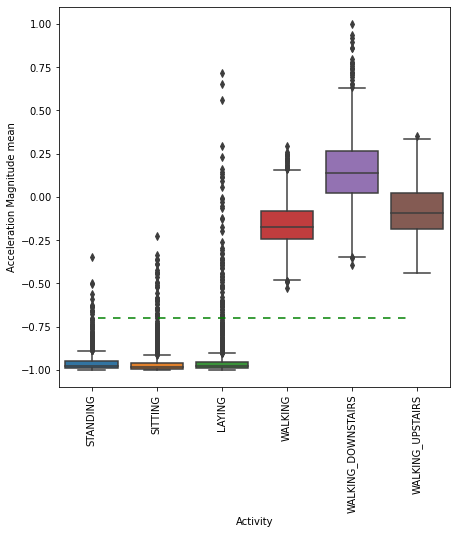

In [57]:
plt.figure(figsize=(7,7))
sns.boxplot(x='Activity', y='tBodyAccMagmean',data=train_new, showfliers = True) # showfliers is used to hide outliers, we are hiding them here 
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.xticks(rotation=90)
plt.show()

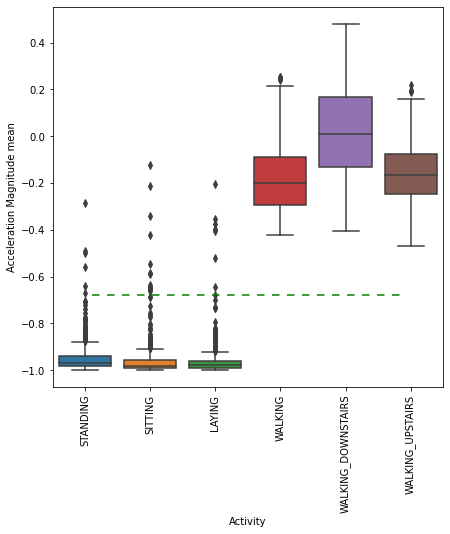

In [58]:
plt.figure(figsize=(7,7))
sns.boxplot(x='Activity', y='tBodyAccMagmean',data=test_new, showfliers = True) # showfliers is used to hide outliers, we are hiding them here 
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.68, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.xticks(rotation=90)
plt.show()

### Removing/Handling outliers 

In [59]:
'''For train'''
stationary_sitting_no_outlier = stationary_sitting[(stationary_sitting.tBodyAccMagmean>lower_limit_sitting) & 
                                                   (stationary_sitting.tBodyAccMagmean<upper_limit_sitting) ]

stationary_standing_no_outlier = stationary_standing[(stationary_standing.tBodyAccMagmean>lower_limit_standing) & 
                                                   (stationary_standing.tBodyAccMagmean<upper_limit_standing) ]

stationary_laying_no_outlier = stationary_laying[(stationary_laying.tBodyAccMagmean>lower_limit_laying) & 
                                                   (stationary_laying.tBodyAccMagmean<upper_limit_laying) ]

non_stationary_walking_no_outlier = non_stationary_walking[(non_stationary_walking.tBodyAccMagmean>lower_limit_walking) & 
                                                   (non_stationary_walking.tBodyAccMagmean<upper_limit_walking) ]

non_stationary_walking_downstairs_no_outlier = non_stationary_walking_downstairs[(non_stationary_walking_downstairs.tBodyAccMagmean>lower_limit_walking_downstairs) & 
                                                   (non_stationary_walking_downstairs.tBodyAccMagmean<upper_limit_walking_downstairs) ]

non_stationary_walking_upstairs_no_outlier = non_stationary_walking_upstairs[(non_stationary_walking_upstairs.tBodyAccMagmean>lower_limit_walking_upstairs) & 
                                                   (non_stationary_walking_upstairs.tBodyAccMagmean<upper_limit_walking_upstairs) ]


'''For test'''

stationary_sitting_no_outlier_test = stationary_sitting_test[(stationary_sitting_test.tBodyAccMagmean>lower_limit_sitting_test) & 
                                                   (stationary_sitting_test.tBodyAccMagmean<upper_limit_sitting_test) ]

stationary_standing_no_outlier_test = stationary_standing_test[(stationary_standing_test.tBodyAccMagmean>lower_limit_standing_test) & 
                                                   (stationary_standing_test.tBodyAccMagmean<upper_limit_standing_test) ]

stationary_laying_no_outlier_test = stationary_laying_test[(stationary_laying_test.tBodyAccMagmean>lower_limit_laying_test) & 
                                                   (stationary_laying_test.tBodyAccMagmean<upper_limit_laying_test) ]

non_stationary_walking_no_outlier_test = non_stationary_walking_test[(non_stationary_walking_test.tBodyAccMagmean>lower_limit_walking_test) & 
                                                   (non_stationary_walking_test.tBodyAccMagmean<upper_limit_walking_test) ]

non_stationary_walking_downstairs_no_outlier_test = non_stationary_walking_downstairs_test[(non_stationary_walking_downstairs_test.tBodyAccMagmean>lower_limit_walking_downstairs_test) & 
                                                   (non_stationary_walking_downstairs_test.tBodyAccMagmean<upper_limit_walking_downstairs_test) ]

non_stationary_walking_upstairs_no_outlier_test = non_stationary_walking_upstairs_test[(non_stationary_walking_upstairs_test.tBodyAccMagmean>lower_limit_walking_upstairs_test) & 
                                                   (non_stationary_walking_upstairs_test.tBodyAccMagmean<upper_limit_walking_upstairs_test) ]



#### Concatenating above datasets 

In [60]:
# basic syntax for concatenation - pd.concat([s1, s2] 
df_no_outliers = pd.concat([stationary_sitting_no_outlier , stationary_standing_no_outlier , stationary_laying_no_outlier ,
                           non_stationary_walking_no_outlier , non_stationary_walking_downstairs_no_outlier ,
                            non_stationary_walking_upstairs_no_outlier])

df_no_outliers_test = pd.concat([stationary_sitting_no_outlier_test , stationary_standing_no_outlier_test , stationary_laying_no_outlier_test ,
                           non_stationary_walking_no_outlier_test , non_stationary_walking_downstairs_no_outlier_test ,
                            non_stationary_walking_upstairs_no_outlier_test])

In [61]:
train.shape

(7352, 563)

In [62]:
test.shape

(2947, 563)

In [63]:
train_new.shape

(7352, 205)

In [64]:
df_no_outliers.shape

(6837, 205)

In [65]:
df_no_outliers_test.shape

(2787, 205)

### calculating percentage of data loss after removing outliers 

In [66]:
print("Percentage of data in train dataset before removing outliers",np.round((7352/10299)*100,2), "%") # 71.39 %
print("Percentage of data in train dataset after removing outliers",np.round((6837/10299)*100,2), "%") # 66.39 %
print("Percentage of data loss:",np.round(((7352-6837)/7352)*100,2), "%") # 7 %
print()
print("------------------------------------------------------------------")
print()
print("Percentage of data in test dataset before removing outliers",np.round((2947/10299)*100,2), "%") # 28.61 %
print("Percentage of data in test dataset after removing outliers",np.round((2787/10299)*100,2), "%") # 27.06 %
print("Percentage of data loss:",np.round(((2947-2787)/2947)*100,2), "%") # 5 %


Percentage of data in train dataset before removing outliers 71.39 %
Percentage of data in train dataset after removing outliers 66.39 %
Percentage of data loss: 7.0 %

------------------------------------------------------------------

Percentage of data in test dataset before removing outliers 28.61 %
Percentage of data in test dataset after removing outliers 27.06 %
Percentage of data loss: 5.43 %


So, we can conclude that there is not much data loss, so, we can continue with our no outliers dataset 

In [67]:
print(df_no_outliers)
print("---------------------------------------------------------------------------------")
print(df_no_outliers_test)

      tBodyAccmeanX  tBodyAccmeanY  tBodyAccmeanZ  tBodyAccstdX  tBodyAccstdZ  \
28         0.287252      -0.037455      -0.145974     -0.982915     -0.941438   
29         0.279998      -0.019484      -0.105724     -0.992818     -0.981493   
33         0.303689      -0.004243      -0.150850     -0.956503     -0.943010   
34         0.290760      -0.024035      -0.116739     -0.977374     -0.962505   
35         0.270908      -0.014413      -0.106522     -0.993856     -0.993470   
...             ...            ...            ...           ...           ...   
7347       0.299665      -0.057193      -0.181233     -0.195387      0.077078   
7348       0.273853      -0.007749      -0.147468     -0.235309      0.059280   
7349       0.273387      -0.017011      -0.045022     -0.218218      0.274533   
7350       0.289654      -0.018843      -0.158281     -0.219139      0.268893   
7351       0.351503      -0.012423      -0.203867     -0.269270      0.177404   

      tBodyAccentropyX  tBo

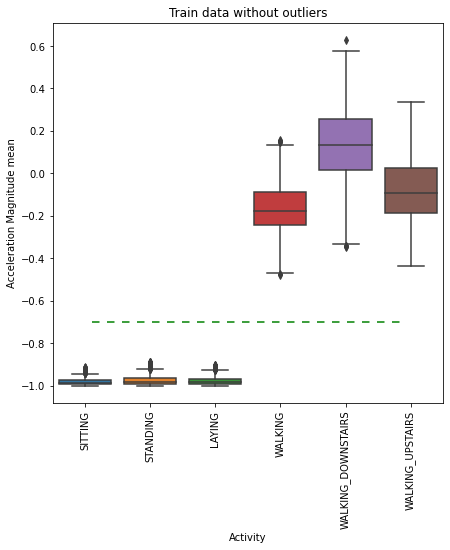

In [68]:
plt.figure(figsize=(7,7))
sns.boxplot(x='Activity', y='tBodyAccMagmean',data=df_no_outliers, showfliers=True) # showfliers is used to hide outliers, we are hiding them here 
plt.ylabel('Acceleration Magnitude mean')
plt.title('Train data without outliers')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.xticks(rotation=90)
plt.show()

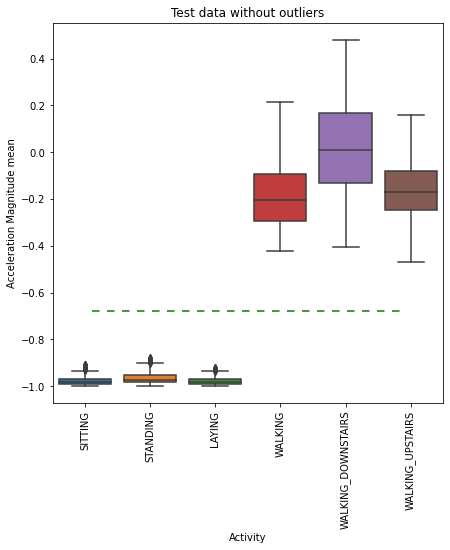

In [69]:
plt.figure(figsize=(7,7))
sns.boxplot(x='Activity', y='tBodyAccMagmean',data=df_no_outliers_test, showfliers=True) # showfliers is used to hide outliers, we are hiding them here 
plt.ylabel('Acceleration Magnitude mean')
plt.title('Test data without outliers')
plt.axhline(y=-0.677, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.xticks(rotation=90)
plt.show()

### Checking for null values in in no outliers dataset

In [70]:
print(df_no_outliers.isna().sum())
print("--------------------------------------------")
print(df_no_outliers_test.isna().sum())

tBodyAccmeanX                        0
tBodyAccmeanY                        0
tBodyAccmeanZ                        0
tBodyAccstdX                         0
tBodyAccstdZ                         0
                                    ..
angletBodyGyroMeangravityMean        0
angletBodyGyroJerkMeangravityMean    0
subject                              0
Activity                             0
tBodyAccMagmean                      0
Length: 205, dtype: int64
--------------------------------------------
tBodyAccmeanX                        0
tBodyAccmeanY                        0
tBodyAccmeanZ                        0
tBodyAccstdX                         0
tBodyAccstdZ                         0
                                    ..
angletBodyGyroMeangravityMean        0
angletBodyGyroJerkMeangravityMean    0
subject                              0
Activity                             0
tBodyAccMagmean                      0
Length: 205, dtype: int64


In [71]:
print('Total number of missing values in train : ', df_no_outliers.isna().values.sum())
print('Total number of missing values in test : ', df_no_outliers_test.isna().values.sum())

Total number of missing values in train :  0
Total number of missing values in test :  0


In [72]:
# We are dropping subject and activity from our dataset.
'''For train'''
y_train_free_out=df_no_outliers['Activity']
X_train_free_out=df_no_outliers.drop(labels=['subject','Activity'], axis=1)

'''For test'''
y_test_free_out=df_no_outliers_test['Activity']
X_test_free_out=df_no_outliers_test.drop(labels=['subject','Activity'], axis=1)

# Machine learning Models

## 1.KNN classifier

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [74]:
knn = KNeighborsClassifier() 

In [75]:
knn.fit(X_train_free_out,y_train_free_out)
ypred = knn.predict(X_test_free_out)

In [76]:
print (str(accuracy_score(y_test_free_out,ypred)*100) + ' %')

86.58055256548259 %


In [77]:
#Finding the optimal model by varying the no. of neighbors
scores = []
train_accuracies=[]
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors = i, n_jobs = -1)
    knn.fit(X_train_free_out,y_train_free_out)
    trainpred=knn.predict(X_train_free_out)
    ypred = knn.predict(X_test_free_out)
    scores.append(accuracy_score(y_test_free_out,ypred))
    train_accuracies.append(accuracy_score(y_train_free_out,trainpred))

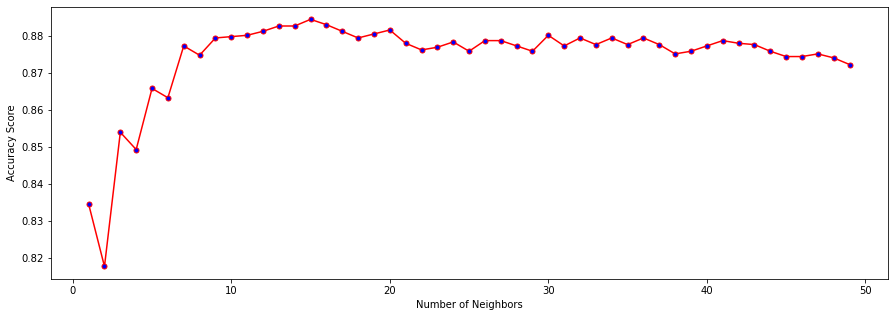

In [78]:
plt.figure(figsize = (15,5)) 
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
xticks = range(1,50)
plt.plot(xticks, scores, color='red', linestyle='solid', marker='o',
         markerfacecolor='blue', markersize=5)

In [79]:
import matplotlib
matplotlib.rcParams.update({'font.size': 20})

In [80]:
plt.show()

In [81]:
scores = np.array(scores)

In [82]:
#Final result after training the model
print('Optimal No. Of Neighbors: ', scores.argmax()+1)
print('Accuracy Score of test: '+ str(scores.max()*100)+ ' %')
print('Accuracy Score of train: '+ str(train_accuracies[scores.argmax()]*100)+ ' %')

Optimal No. Of Neighbors:  15
Accuracy Score of test: 88.44635809113743 %
Accuracy Score of train: 96.40193067134707 %


In [83]:
# Importing the required function
from sklearn.metrics import confusion_matrix

In [84]:
# Creating a confusion matrix on the training data
train_conf_matrix = confusion_matrix(y_train_free_out,trainpred)
# Converting the train_conf_matrix into a DataFrame for better readability
pd.DataFrame(train_conf_matrix,columns=knn.classes_,index=knn.classes_)

,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
LAYING,1216,14,6,0,0,0
SITTING,9,916,205,0,0,0
STANDING,0,89,1157,1,0,0
WALKING,0,0,0,1181,4,7
WALKING_DOWNSTAIRS,0,0,0,55,868,37
WALKING_UPSTAIRS,0,0,0,14,6,1052


In [85]:
# Confusion matrix for the test data
test_conf_matrix = confusion_matrix(y_test_free_out,ypred)
pd.DataFrame(test_conf_matrix,columns=knn.classes_,index=knn.classes_)

,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
LAYING,470,16,5,0,0,0
SITTING,0,328,101,0,0,2
STANDING,0,42,444,0,0,0
WALKING,0,0,0,490,0,2
WALKING_DOWNSTAIRS,0,0,0,92,296,32
WALKING_UPSTAIRS,0,0,0,57,7,403


In [86]:
from sklearn.metrics import classification_report
# Generating the report and printing the same
print(classification_report(y_test_free_out,ypred))

                    precision    recall  f1-score   support

            LAYING       1.00      0.96      0.98       491
           SITTING       0.85      0.76      0.80       431
          STANDING       0.81      0.91      0.86       486
           WALKING       0.77      1.00      0.87       492
WALKING_DOWNSTAIRS       0.98      0.70      0.82       420
  WALKING_UPSTAIRS       0.92      0.86      0.89       467

          accuracy                           0.87      2787
         macro avg       0.89      0.87      0.87      2787
      weighted avg       0.88      0.87      0.87      2787



## 2.Decision Tree 

In [87]:
# Importing required class 
from sklearn.tree import DecisionTreeClassifier
# Creating an object of the DecisionTreeClassifier model
model = DecisionTreeClassifier(random_state = 1)
# Training model on the training data
model.fit(X_train_free_out,y_train_free_out)

DecisionTreeClassifier(random_state=1)

In [88]:
# Predicting target values using the model built on training data
train_predictions = model.predict(X_train_free_out)
test_predictions = model.predict(X_test_free_out)


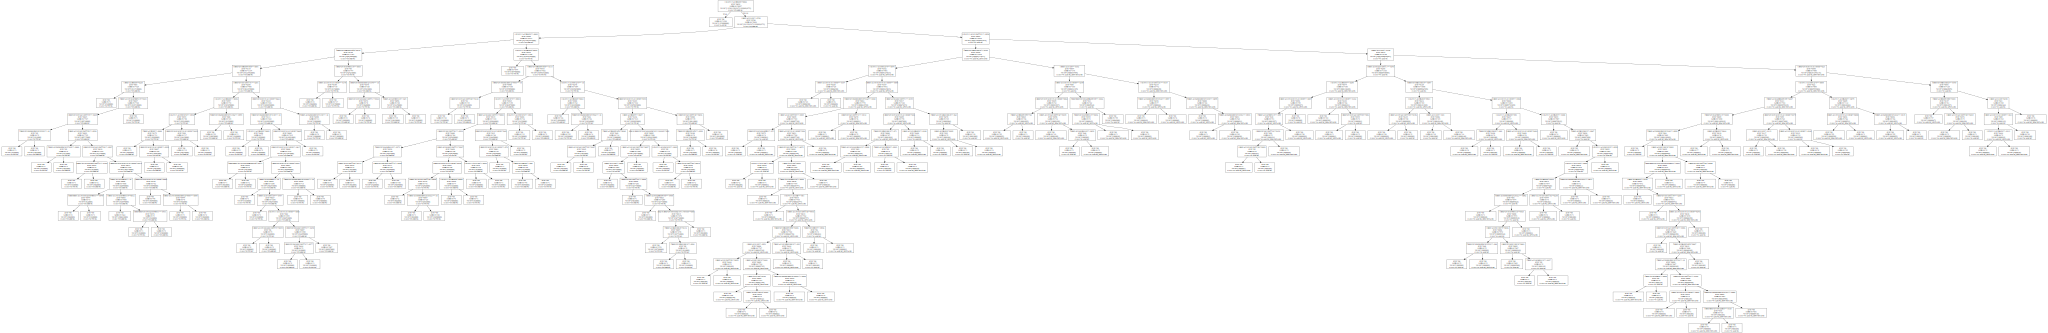

In [89]:
# Importing the required libraries (Ensure that they are already installed.)
from sklearn.tree import export_graphviz
import graphviz
# Generating the tree
dot_data = export_graphviz(model, out_file=None,
                          feature_names=X_train_free_out.columns,  
                          class_names=model.classes_,  
                          ) 
graph = graphviz.Source(dot_data) 
graph

In [90]:
from sklearn.metrics import accuracy_score
print (str(accuracy_score(y_test_free_out,test_predictions)*100) + ' %')
print (str(accuracy_score(y_train_free_out,train_predictions)*100) + ' %')

82.74129888769286 %
100.0 %


In [91]:
# Importing the required function
from sklearn.metrics import confusion_matrix
# Creating a confusion matrix on the training data
train_conf_matrix = confusion_matrix(y_train_free_out,train_predictions)
# Converting the train_conf_matrix into a DataFrame for better readability
pd.DataFrame(train_conf_matrix,columns=model.classes_,index=model.classes_)

,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
LAYING,1236,0,0,0,0,0
SITTING,0,1130,0,0,0,0
STANDING,0,0,1247,0,0,0
WALKING,0,0,0,1192,0,0
WALKING_DOWNSTAIRS,0,0,0,0,960,0
WALKING_UPSTAIRS,0,0,0,0,0,1072


In [92]:
# Importing the required function
from sklearn.metrics import confusion_matrix
# Creating a confusion matrix on the training data
train_conf_matrix = confusion_matrix(y_test_free_out,test_predictions)
# Converting the train_conf_matrix into a DataFrame for better readability
pd.DataFrame(train_conf_matrix,columns=model.classes_,index=model.classes_)

,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
LAYING,491,0,0,0,0,0
SITTING,0,333,98,0,0,0
STANDING,0,73,413,0,0,0
WALKING,0,0,0,420,47,25
WALKING_DOWNSTAIRS,0,0,0,73,297,50
WALKING_UPSTAIRS,0,0,0,70,45,352


In [93]:
from sklearn.metrics import classification_report
# Generating the report and printing the same
print(classification_report(y_test_free_out,test_predictions))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       491
           SITTING       0.82      0.77      0.80       431
          STANDING       0.81      0.85      0.83       486
           WALKING       0.75      0.85      0.80       492
WALKING_DOWNSTAIRS       0.76      0.71      0.73       420
  WALKING_UPSTAIRS       0.82      0.75      0.79       467

          accuracy                           0.83      2787
         macro avg       0.83      0.82      0.82      2787
      weighted avg       0.83      0.83      0.83      2787



## 3. Random forest 

In [94]:
'''For test'''

#Importing libraries needed
import numpy as np 
import pandas as pd
#Defining the dataframe
df=df_no_outliers_test
print(df.head())

#Sorting the count in the column Activity
sizes=df['Activity'].value_counts(sort='sitting')
print(sizes)

#Dropping all the null values
df=df.dropna()
#Dropping the column
Y = df['Activity'].values
X=df.drop(labels=['Activity','subject'],axis=1)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=20)
print(X_test)

from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(n_estimators=10,random_state=30)
model.fit(X_train,Y_train)
prediction_test = model.predict(X_test)
print(prediction_test)

from sklearn import metrics
print("Accuracy = ",metrics.accuracy_score(Y_test,prediction_test))

    tBodyAccmeanX  tBodyAccmeanY  tBodyAccmeanZ  tBodyAccstdX  tBodyAccstdZ  \
31       0.296487      -0.014685      -0.139808     -0.987714     -0.941050   
32       0.277235      -0.025677      -0.118431     -0.996390     -0.965410   
33       0.278291      -0.014536      -0.105243     -0.996786     -0.989502   
34       0.278160      -0.007668      -0.099271     -0.996975     -0.987355   
35       0.276646      -0.004975      -0.104754     -0.997270     -0.981145   

    tBodyAccentropyX  tBodyAccentropyY  tBodyAccentropyZ  tBodyAccarCoeffX1  \
31         -0.181447         -0.348237         -0.663656           0.366027   
32         -0.650276         -0.557193         -0.559387           0.176539   
33         -0.647231         -0.525312         -0.504379           0.323552   
34         -0.644387         -0.213789         -0.380819           0.360070   
35         -0.713937         -0.177958         -0.427141           0.330634   

    tBodyAccarCoeffX2  ...  fBodyBodyGyroJerkMagma

['STANDING' 'STANDING' 'LAYING' 'STANDING' 'SITTING' 'STANDING'
 'WALKING_DOWNSTAIRS' 'STANDING' 'WALKING' 'STANDING' 'LAYING' 'WALKING'
 'WALKING_UPSTAIRS' 'WALKING_UPSTAIRS' 'WALKING_UPSTAIRS' 'STANDING'
 'STANDING' 'LAYING' 'STANDING' 'WALKING_DOWNSTAIRS' 'STANDING' 'STANDING'
 'WALKING' 'LAYING' 'LAYING' 'STANDING' 'WALKING' 'WALKING' 'SITTING'
 'WALKING' 'WALKING' 'WALKING_DOWNSTAIRS' 'SITTING' 'SITTING' 'SITTING'
 'WALKING_UPSTAIRS' 'WALKING_UPSTAIRS' 'WALKING_UPSTAIRS' 'LAYING'
 'SITTING' 'WALKING_DOWNSTAIRS' 'LAYING' 'WALKING' 'LAYING'
 'WALKING_DOWNSTAIRS' 'WALKING_UPSTAIRS' 'WALKING_UPSTAIRS' 'STANDING'
 'WALKING_DOWNSTAIRS' 'STANDING' 'WALKING_UPSTAIRS' 'WALKING_UPSTAIRS'
 'WALKING_UPSTAIRS' 'SITTING' 'SITTING' 'WALKING' 'LAYING'
 'WALKING_UPSTAIRS' 'SITTING' 'SITTING' 'WALKING_UPSTAIRS'
 'WALKING_UPSTAIRS' 'LAYING' 'WALKING_UPSTAIRS' 'SITTING' 'STANDING'
 'WALKING_UPSTAIRS' 'WALKING_UPSTAIRS' 'WALKING' 'SITTING'
 'WALKING_UPSTAIRS' 'WALKING' 'WALKING_UPSTAIRS' 'WALKING' 'LA

In [95]:
'''For test'''

from sklearn.metrics import confusion_matrix
train_conf_matrix = confusion_matrix(Y_test,prediction_test)
pd.DataFrame(train_conf_matrix,columns=model.classes_,index=model.classes_)

,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
LAYING,162,0,0,0,0,0
SITTING,1,116,14,0,0,0
STANDING,0,10,136,0,0,0
WALKING,0,0,0,137,3,4
WALKING_DOWNSTAIRS,0,0,0,0,102,8
WALKING_UPSTAIRS,0,0,0,0,1,143


In [96]:
'''For train'''

#Importing libraries needed
import numpy as np 
import pandas as pd
#Defining the dataframe
df=df_no_outliers
print(df.head())

#Sorting the count in the column Activity
sizes=df['Activity'].value_counts(sort='sitting')
print(sizes)

#Dropping all the null values
df=df.dropna()
#Dropping the column
Y = df['Activity'].values
X=df.drop(labels=['Activity','subject'],axis=1)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=20)
print(X_test)

from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(n_estimators=10,random_state=30)
model.fit(X_train,Y_train)
prediction_test = model.predict(X_test)
print(prediction_test)

from sklearn import metrics
print("Accuracy = ",metrics.accuracy_score(Y_test,prediction_test))

    tBodyAccmeanX  tBodyAccmeanY  tBodyAccmeanZ  tBodyAccstdX  tBodyAccstdZ  \
28       0.287252      -0.037455      -0.145974     -0.982915     -0.941438   
29       0.279998      -0.019484      -0.105724     -0.992818     -0.981493   
33       0.303689      -0.004243      -0.150850     -0.956503     -0.943010   
34       0.290760      -0.024035      -0.116739     -0.977374     -0.962505   
35       0.270908      -0.014413      -0.106522     -0.993856     -0.993470   

    tBodyAccentropyX  tBodyAccentropyY  tBodyAccentropyZ  tBodyAccarCoeffX1  \
28         -0.238789         -0.482638         -0.692823           0.092021   
29         -0.496179         -0.397707         -0.473423           0.323712   
33          0.073576         -0.218186         -0.722846          -0.070904   
34         -0.213255         -0.622337         -0.521163           0.189093   
35         -0.688861         -0.578314         -0.571067           0.199257   

    tBodyAccarCoeffX2  ...  fBodyBodyGyroJerkMagma

['WALKING_DOWNSTAIRS' 'WALKING_DOWNSTAIRS' 'SITTING' ... 'WALKING'
 'STANDING' 'STANDING']
Accuracy =  0.9610136452241715


In [97]:
'''For train'''

from sklearn.metrics import confusion_matrix
train_conf_matrix = confusion_matrix(Y_test,prediction_test)
pd.DataFrame(train_conf_matrix,columns=model.classes_,index=model.classes_)

,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
LAYING,376,1,0,0,0,0
SITTING,0,294,31,0,0,0
STANDING,0,21,343,0,0,0
WALKING,0,0,0,337,6,3
WALKING_DOWNSTAIRS,0,0,0,2,290,6
WALKING_UPSTAIRS,0,0,0,4,6,332


## 4. SVM 

In [98]:

# Transforming non numerical labels into numerical labels
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
Y_train_label = train.Activity.values.astype(object)
Y_test_label = test.Activity.values.astype(object)

# encoding train labels 
encoder.fit(Y_train_label)
Y_train = encoder.transform(Y_train_label)

# encoding test labels 
encoder.fit(Y_test_label)
Y_test = encoder.transform(Y_test_label)

In [99]:
#Scaling the train and test feature set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_free_out)
X_test_scaled = scaler.transform(X_test_free_out)

In [100]:
X_train_scaled

array([[ 0.20970735, -0.90928488, -1.03347274, ...,  0.03943035,
        -0.2511896 , -0.8219436 ],
       [ 0.07141197, -0.04361756,  0.11951627, ...,  0.02435092,
         0.02655241, -0.91019519],
       [ 0.52308421,  0.690555  , -1.17314563, ...,  0.03232032,
        -0.26622112, -0.78314746],
       ...,
       [-0.05460943,  0.07552748,  1.85832613, ...,  1.38119208,
         1.47369193,  1.11507759],
       [ 0.25551044, -0.01274087, -1.38598796, ...,  1.49789926,
        -1.21433439,  1.11818037],
       [ 1.43464285,  0.296508  , -2.69182233, ..., -0.10529032,
        -1.27156166,  1.02109646]])

In [101]:
#Hyperparameter tuning for SVM
#Here we select two kernels RBF and Linear kernal and their respective hyperparameters and 
#then apply Gridsearch method to select the best parameters
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [102]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

# Performing CV to tune parameters for best SVM fit 
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train_scaled, y_train_free_out)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [103]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_

Y_pred = final_model.predict(X_test_scaled)
Y_pred_train = final_model.predict(X_train_scaled)
Y_pred_train
#Y_pred_label = list(encoder.inverse_transform(Y_pred))


Best score for training data: 0.9314112518555595 

Best C: 10 

Best Kernel: rbf 

Best Gamma: 0.001 



array(['SITTING', 'SITTING', 'SITTING', ..., 'WALKING_UPSTAIRS',
       'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS'], dtype=object)

In [104]:
# Making the Confusion Matrix
#print(pd.crosstab(Y_test_label, Y_pred_label, rownames=['Actual Activity'], colnames=['Predicted Activity']))
'''
print(confusion_matrix(Y_test_label,Y_pred_label))
print("\n")
print(classification_report(Y_test_label,Y_pred_label))
'''

print("Training set score for SVM: %f" % final_model.score(X_train_scaled , y_train_free_out))
print("Testing  set score for SVM: %f" % final_model.score(X_test_scaled  , y_test_free_out))

svm_model.score

Training set score for SVM: 0.990054
Testing  set score for SVM: 0.947973


<bound method BaseSearchCV.score of GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])>

In [105]:
from sklearn.metrics import classification_report
# Generating the report and printing the same
print(classification_report(y_test_free_out,Y_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       491
           SITTING       0.94      0.89      0.91       431
          STANDING       0.91      0.95      0.93       486
           WALKING       0.93      0.99      0.96       492
WALKING_DOWNSTAIRS       0.96      0.93      0.95       420
  WALKING_UPSTAIRS       0.96      0.92      0.94       467

          accuracy                           0.95      2787
         macro avg       0.95      0.95      0.95      2787
      weighted avg       0.95      0.95      0.95      2787



In [106]:
'''For test'''
# Importing the required function
from sklearn.metrics import confusion_matrix
# Creating a confusion matrix on the training data
train_conf_matrix = confusion_matrix(y_test_free_out,Y_pred)
# Converting the train_conf_matrix into a DataFrame for better readability
pd.DataFrame(train_conf_matrix,columns=svm_model.classes_,index=svm_model.classes_)


,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
LAYING,491,0,0,0,0,0
SITTING,2,383,46,0,0,0
STANDING,0,26,460,0,0,0
WALKING,0,0,0,489,1,2
WALKING_DOWNSTAIRS,0,0,0,12,391,17
WALKING_UPSTAIRS,0,0,0,24,15,428


In [129]:
'''For train'''
# Importing the required function
from sklearn.metrics import confusion_matrix
# Creating a confusion matrix on the training data
train_conf_matrix = confusion_matrix(y_train_free_out,Y_pred_train)
# Converting the train_conf_matrix into a DataFrame for better readability
pd.DataFrame(train_conf_matrix,columns=svm_model.classes_,index=svm_model.classes_)


,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
LAYING,1236,0,0,0,0,0
SITTING,0,1100,30,0,0,0
STANDING,0,37,1210,0,0,0
WALKING,0,0,0,1192,0,0
WALKING_DOWNSTAIRS,0,0,0,0,960,0
WALKING_UPSTAIRS,0,0,0,0,1,1071


## 5.K-means clustering

In [107]:
df_no_outliers.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdZ,tBodyAccentropyX,tBodyAccentropyY,tBodyAccentropyZ,tBodyAccarCoeffX1,tBodyAccarCoeffX2,...,fBodyBodyGyroJerkMagmaxInds,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,subject,Activity,tBodyAccMagmean
28,0.287252,-0.037455,-0.145974,-0.982915,-0.941438,-0.238789,-0.482638,-0.692823,0.092021,-0.094523,...,-0.968254,0.582426,-0.743397,0.194735,-0.148056,0.033529,-0.127028,1,SITTING,-0.934594
29,0.279998,-0.019484,-0.105724,-0.992818,-0.981493,-0.496179,-0.397707,-0.473423,0.323712,-0.275756,...,-0.777778,0.755593,-0.768623,-0.228688,-0.097215,0.024192,0.006329,1,SITTING,-0.976995
33,0.303689,-0.004243,-0.150850,-0.956503,-0.943010,0.073576,-0.218186,-0.722846,-0.070904,-0.040271,...,-1.000000,0.123490,-0.176812,-0.012338,0.094622,0.029127,-0.134245,1,SITTING,-0.915954
34,0.290760,-0.024035,-0.116739,-0.977374,-0.962505,-0.213255,-0.622337,-0.521163,0.189093,-0.086809,...,-0.936508,0.200925,-0.508127,0.096193,-0.131375,0.077640,-0.037327,1,SITTING,-0.974805
35,0.270908,-0.014413,-0.106522,-0.993856,-0.993470,-0.688861,-0.578314,-0.571067,0.199257,-0.148483,...,-0.936508,0.054595,-0.430744,0.064398,0.300924,0.117655,-0.046455,1,SITTING,-0.995238


In [108]:
# df.drop(columns=['Total'])
X = df_no_outliers.drop(columns=['subject','Activity'])

In [109]:
X_train = X.values
X_train

array([[ 0.28725164, -0.03745506, -0.14597431, ...,  0.03352945,
        -0.12702787, -0.93459377],
       [ 0.2799976 , -0.01948404, -0.10572355, ...,  0.02419164,
         0.00632912, -0.97699498],
       [ 0.30368927, -0.0042428 , -0.15085028, ...,  0.02912662,
        -0.13424521, -0.91595384],
       ...,
       [ 0.27338737, -0.01701062, -0.04502183, ...,  0.86440401,
         0.70116882, -0.0039358 ],
       [ 0.28965416, -0.01884304, -0.15828059, ...,  0.93667394,
        -0.58947895, -0.00244504],
       [ 0.35150347, -0.01242312, -0.20386717, ..., -0.05608759,
        -0.61695645, -0.04908982]])

### What is inertia
Inertia is the within-cluster sum of squares criterion. It is a metric that shows how internally coherent the clusters are. Inertia assumes that clusters are convex and isotropic; performs poorly elongated clusters, or manifolds with irregular shapes; better use hierarchical clustering here. Inertia also performs poorly in very high-dimensional spaces since Euclidean distances become inflated and no normalisation is applied beforehand; not a normalised metric.

In [110]:
no_of_clusters = range(1,11) #This is for elbow method
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

The innertia for : 1 Clusters is: 97774.50201428765
The innertia for : 2 Clusters is: 77093.01345846678
The innertia for : 3 Clusters is: 72025.8123857412
The innertia for : 4 Clusters is: 69397.08860579383
The innertia for : 5 Clusters is: 67274.19145208127
The innertia for : 6 Clusters is: 65251.8320581464
The innertia for : 7 Clusters is: 63803.90014680802
The innertia for : 8 Clusters is: 62410.42364371922
The innertia for : 9 Clusters is: 61514.80036818449
The innertia for : 10 Clusters is: 60659.61571484511


Text(0.5, 1.0, 'Inertia Plot per k')

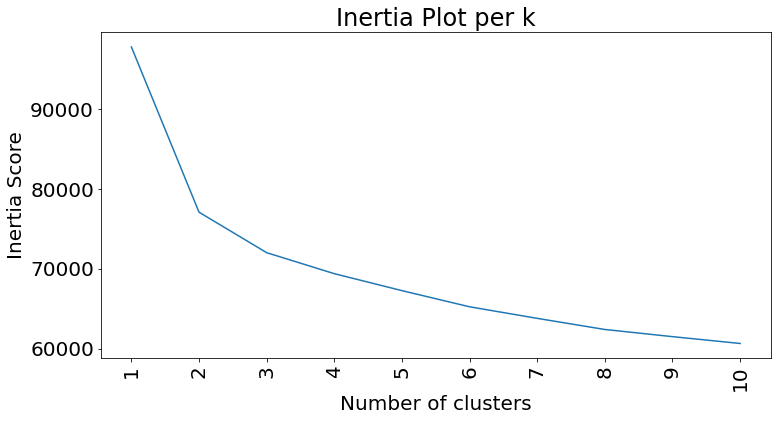

In [111]:
# Creating the plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(12,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [112]:
no_of_clusters

range(1, 11)

In [124]:
kmeans = KMeans(n_clusters=2, random_state=540) #choosing n=3 from the graph above
kmeans = kmeans.fit(X_train)

# Prints the clusters it assigned to each observation
print("The clusters are: ", kmeans.labels_)

# Prints the Inertia
print("The Inertia is: ", kmeans.inertia_)

The clusters are:  [0 0 0 ... 1 1 1]
The Inertia is:  77093.01345846678


In [125]:
kmeans.labels_.shape

(6837,)

In [126]:
kmeans = KMeans(n_clusters=2)
kmeans = kmeans.fit(X_train)

kmeans.labels_

# "predictions" for new data
predictions = kmeans.predict(X_train)

# calculating the Counts of the cluster
unique, counts = np.unique(predictions, return_counts=True)
display(unique)
counts = counts.reshape(1,2)
display(counts)

# Creating a dataframe
countscldf = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1"])

# display
countscldf

array([0, 1])

array([[3249, 3588]], dtype=int64)

,Cluster 0,Cluster 1
0,3249,3588


In [116]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(X_train)
y_predicted

array([1, 1, 1, ..., 0, 0, 0])

In [117]:
# For centroids
print("For cluster 0: ",km.cluster_centers_[:,0])
print("For cluster 1: ",km.cluster_centers_[:,1])


For cluster 0:  [0.27548918 0.27694239]
For cluster 1:  [-0.02014693 -0.01715835]


Text(0.5, 1.0, 'Centroids')

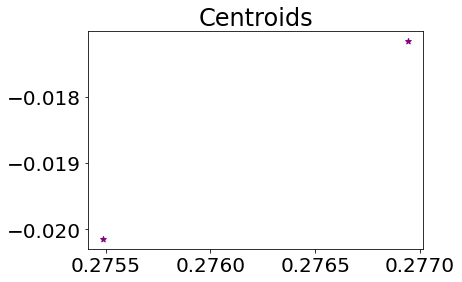

In [118]:
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.title('Centroids')

Text(0.5, 1.0, 'Clusters')

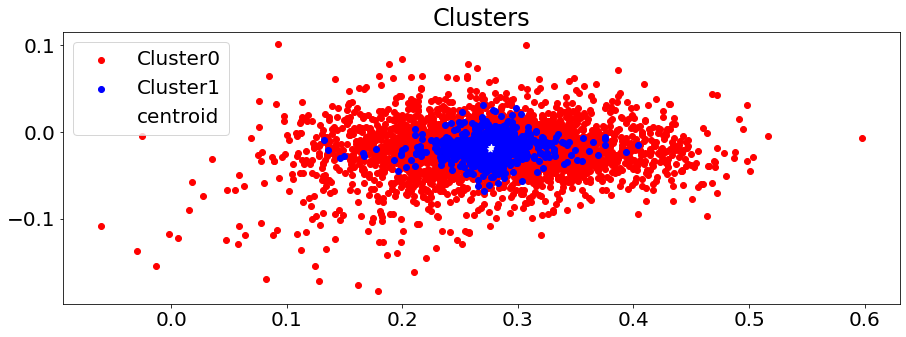

In [127]:
plt.figure(figsize = (15,5))
plt.scatter(X_train[predictions==0,0],X_train[predictions==0,1],c='red',label='Cluster0')
plt.scatter(X_train[predictions==1,0],X_train[predictions==1,1],c='blue',label='Cluster1')

# plt.scatter(X_train[predictions==2,0],X_train[predictions==2,1],c='green',label='Cluster2')
# plt.scatter(X_train[predictions==3,0],X_train[predictions==3,1],c='yellow',label='Cluster3')
# plt.scatter(X_train[predictions==4,0],X_train[predictions==4,1],c='pink',label='Cluster4')
# plt.scatter(X_train[predictions==5,0],X_train[predictions==5,1],c='black',label='Cluster5')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='white',marker='*',label='centroid')
plt.legend()
plt.title('Clusters')

CONCLUSION - After visualizing above scatter plot , we cannot differ clusters so we are not going to apply K-means clustering on our dataset because clusters are overlapping.

### Comparing the accuracies of all models to choose the best model for our dataset

In [128]:
tab1 = pd.DataFrame([
                      [1,'KNN',96.4,88.44,'Inconsistent'],
                      [2,'Decision Tree',100.00,82.74,'Inconsistent'],
                      [3,'Random forest',95.10,96.10,'Consistent'],
                      [4,'SVM',99.00,94.7,'Consistent']
                     ], 
                      columns = ['S.No','Model name','Train Accuracy','Test Accuracy','Consistent/Inconsistent'])
tab1

,S.No,Model name,Train Accuracy,Test Accuracy,Consistent/Inconsistent
0,1,KNN,96.4,88.44,Inconsistent
1,2,Decision Tree,100.0,82.74,Inconsistent
2,3,Random forest,95.1,96.10,Consistent
3,4,SVM,99.0,94.70,Consistent


Reason why we didn't use precision, recall and F1 score to compare our models are:-
- Precision matters when there is high cost associated with false positives
- Recall matters when there is high cost associated with false negatives
- F1 score is better for imbalance classes

Since,  Our problem statement is a multi class Classification problem, and not a binary classification so we cannot really identify false postives and false negatives.
So our selection of model is based on the training and testing accuracy and the consistency of the model. 

# CONCLUSION-

- Since there is a significant difference in the train and test accuracies of KNN and decision tree, these models become inconsistent.

- And In Random Forest, test accurcay is more than the train accuracy which also makes it inconsistent.

So after going through all the evaluation metrics, we come to a conclusion that SVM is the best fit model for our dataset.